# What this file does

Looks at facility level data provided by Health and Human Services to assess hospital capacity. Skip to the "Formulae" section to see results.

In [46]:
import pandas as pd

# Tools

In [47]:
df = pd.read_csv('reported_hospital_capacity_admissions_facility_level_weekly_average_timeseries_20201214.csv')

In [48]:
#columns;pediatric estimates seem to be negative (suppressed?)

In [49]:
df.columns

Index(['hospital_pk', 'collection_week', 'state', 'ccn', 'hospital_name',
       'address', 'city', 'zip', 'hospital_subtype', 'fips_code',
       'is_metro_micro', 'total_beds_7_day_avg',
       'all_adult_hospital_beds_7_day_avg',
       'all_adult_hospital_inpatient_beds_7_day_avg',
       'inpatient_beds_used_7_day_avg',
       'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
       'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
       'inpatient_beds_7_day_avg', 'total_icu_beds_7_day_avg',
       'total_staffed_adult_icu_beds_7_day_avg', 'icu_beds_used_7_day_avg',
       'staffed_adult_icu_bed_occupancy_7_day_avg',
       'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
       'staffed_icu_adult_p

# Filtering

In [50]:
df_ct= df[df['state']=='CT']

In [51]:
df['collection_week'] =pd.to_datetime(df['collection_week'])

This date marks the start of the collection week

In [52]:
df_ct['collection_week'].max()

'2020-12-04'

In [53]:
df_ct[df_ct['collection_week'] == df_ct['collection_week'].max()]['city'].unique()

array(['NORWALK', 'STAMFORD', 'DANBURY', 'GREENWICH', 'BRIDGEPORT',
       'HARTFORD', 'NEW BRITAIN', 'FARMINGTON', 'MANCHESTER', 'BRISTOL',
       'SHARON', 'TORRINGTON', 'MIDDLETOWN', 'DERBY', 'BRANFORD',
       'WALLINGFORD', 'WATERBURY', 'MERIDEN', 'NEW HAVEN', 'NEW LONDON',
       'NORWICH', 'STAFFORD SPRINGS', 'ROCKVILLE', 'PUTNAM',
       'WILLIMANTIC'], dtype=object)

In [54]:
df_latest = df_ct[df_ct['collection_week'] == df_ct['collection_week'].max()]

In [55]:
#comparing with CHA list:
 # HOSPITAL FOR SPECIAL CARE, GAYLORD HOSPITAL INC and CONNECTICUT HOSPICE INC,THE don't feature in their list of acute hospitals

In [56]:
df_latest['hospital_name'].unique()

array(['NORWALK HOSPITAL', 'STAMFORD HOSPITAL', 'DANBURY HOSPITAL',
       'GREENWICH HOSPITAL ASSOCIATION -', "ST VINCENT'S MEDICAL CENTER",
       'BRIDGEPORT HOSPITAL', 'HARTFORD HOSPITAL',
       'HOSPITAL OF CENTRAL CONNECTICUT, THE', 'JOHN DEMPSEY HOSPITAL',
       'ST FRANCIS HOSPITAL & MEDICAL CENTER',
       'HOSPITAL FOR SPECIAL CARE',
       'CONNECTICUT CHILDRENS MEDICAL CENTER',
       'MANCHESTER MEMORIAL HOSPITAL', 'BRISTOL HOSPITAL',
       'SHARON HOSPITAL', 'CHARLOTTE HUNGERFORD HOSPITAL',
       'MIDDLESEX HOSPITAL', 'GRIFFIN HOSPITAL',
       'CONNECTICUT HOSPICE INC,THE', 'GAYLORD HOSPITAL INC',
       'WATERBURY HOSPITAL', 'MIDSTATE MEDICAL CENTER',
       'YALE-NEW HAVEN HOSPITAL', "SAINT MARY'S HOSPITAL",
       'LAWRENCE & MEMORIAL HOSPITAL', 'WILLIAM W BACKUS HOSPITAL',
       'JOHNSON MEMORIAL HOSPITAL', 'ROCKVILLE GENERAL HOSPITAL',
       'DAY KIMBALL HOSPITAL', 'WINDHAM COMM MEM HOSP & HATCH HOSP'],
      dtype=object)

In [57]:
df_latest['city'].value_counts()

HARTFORD            3
NEW BRITAIN         2
BRIDGEPORT          2
WATERBURY           2
TORRINGTON          1
NORWICH             1
ROCKVILLE           1
DANBURY             1
SHARON              1
STAFFORD SPRINGS    1
WILLIMANTIC         1
BRISTOL             1
PUTNAM              1
NEW LONDON          1
NEW HAVEN           1
GREENWICH           1
FARMINGTON          1
MIDDLETOWN          1
DERBY               1
MERIDEN             1
WALLINGFORD         1
NORWALK             1
BRANFORD            1
STAMFORD            1
MANCHESTER          1
Name: city, dtype: int64

# Formulae to calculate hospital capacity

GitHub documentation of dataset; negative values indicate suppressed values
https://github.com/CareSet/COVID_Hospital_PUF?src=hd

Where HHS results may differ from CHA values:
- using 7 day averages for all numbers, not daily (dataset updated once a week) 
- different ways of handling missing values; numbers reported to HHSdaily and aggregated over the week; discrepancies may arise if a hospital misses a day of reporting, say.
- using staffed, adult beds in ICU nummbers
- inpatient beds do not make a distinction between adult and staffed in the same way 
- definition of a bed 
- three facilities in this dataset do not appear in CHA's list

In [134]:
def calculate_hosp_icu_capacity(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['staffed_adult_icu_bed_occupancy_7_day_avg']/df_latest[df_latest['hospital_name'] == hosp]['total_staffed_adult_icu_beds_7_day_avg']).values[0]

In [135]:
def calculate_hosp_icus(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['total_staffed_adult_icu_beds_7_day_avg']).values[0]

In [136]:
def calculate_hosp_inpatient_capacity(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['inpatient_beds_used_7_day_avg']/df_latest[df_latest['hospital_name'] == hosp]['inpatient_beds_7_day_avg']).values[0]

In [137]:
def calculate_all_beds_avg(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['all_adult_hospital_beds_7_day_avg']).values[0]

In [147]:
def calculate_hosp_inpatient_beds(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['total_beds_7_day_avg']).values[0]

In [139]:
def calculate_pct_covid(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg']).values[0]/pd.Series(df_latest[df_latest['hospital_name'] == hosp]['all_adult_hospital_beds_7_day_avg']).values[0]

In [140]:
def city(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['city']).values[0]

In [141]:
calculate_hosp_icu_capacity('STAMFORD HOSPITAL')

0.778125

In [142]:
calculate_hosp_inpatient_capacity('STAMFORD HOSPITAL')

0.9027120103314679

In [148]:
list_hosp_capacity = []
for hosp in list(df_latest['hospital_name'].unique()):
    dict_hosp = {}
    dict_hosp['name']= hosp
    dict_hosp['city']= city(hosp)
    dict_hosp['% Adult, Staffed ICUs Occupied'] = round(100*calculate_hosp_icu_capacity(hosp),2)
    dict_hosp['% Inpatient beds used'] = round(100*calculate_hosp_inpatient_capacity(hosp),2)
    dict_hosp['ICUs Total'] = calculate_hosp_icus(hosp)
    dict_hosp['Inpatient beds Total'] = calculate_hosp_inpatient_beds(hosp)
    dict_hosp['Pct_beds_covid'] = calculate_pct_covid(hosp)
    dict_hosp['all_beds_avg'] = calculate_all_beds_avg(hosp)

    list_hosp_capacity += [dict_hosp]


In [149]:
#notes on data: negative values indicate suppressed numbers; percentages may exceed 100 if a hospital is operating above capacity
#

In [150]:
pd.DataFrame(list_hosp_capacity)

,name,city,"% Adult, Staffed ICUs Occupied",% Inpatient beds used,ICUs Total,Inpatient beds Total,Pct_beds_covid,all_beds_avg
0,NORWALK HOSPITAL,NORWALK,37.67,50.38,30.0,293.0,0.159386,293.0
1,STAMFORD HOSPITAL,STAMFORD,77.81,90.27,32.0,268.0,0.178988,257.0
2,DANBURY HOSPITAL,DANBURY,79.50,72.24,20.0,339.0,0.218919,333.0
3,GREENWICH HOSPITAL ASSOCIATION -,GREENWICH,26.67,72.54,30.0,205.0,0.258580,169.0
4,ST VINCENT'S MEDICAL CENTER,BRIDGEPORT,26.36,75.73,66.0,253.0,0.203953,253.0
5,BRIDGEPORT HOSPITAL,BRIDGEPORT,83.79,52.65,58.0,762.0,0.192956,724.0
6,HARTFORD HOSPITAL,HARTFORD,49.11,87.71,158.0,849.0,0.152768,849.0
7,"HOSPITAL OF CENTRAL CONNECTICUT, THE",NEW BRITAIN,48.55,78.16,55.0,282.0,0.193972,282.0
8,JOHN DEMPSEY HOSPITAL,FARMINGTON,63.93,65.07,28.0,234.0,0.200855,234.0
9,ST FRANCIS HOSPITAL & MEDICAL CENTER,HARTFORD,91.39,68.23,45.3,504.0,0.168683,463.0


Questions:
- Find source of discrepancy with CHA data
- Examine calculations of state-level estimates (https://protect-public.hhs.gov/datasets/state-representative-estimates-for-hospital-utilization/data?geometry=89.569%2C-16.702%2C-96.408%2C72.161&orderBy=state_name)
- Aggregate on city level? Have to figure out how to handle suppressed values
- What's the story here? 
- Further analysis: Dataset includes age breakdowns of COVID patients, need to see how to clean it before I can work with it

# COVID in CT hospitals

Age breakdowns all suppressed

In [23]:
for column in list(df_latest.columns):
    if 'covid' in column:
        print(column)

total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg
total_adult_patients_hospitalized_confirmed_covid_7_day_avg
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg
total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg
staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg
staffed_icu_adult_patients_confirmed_covid_7_day_avg
total_patients_hospitalized_confirmed_influenza_and_covid_7_day_avg
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
total_adult_patients_hospitalized_confirmed_covid_7_day_sum
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum
staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum
staffed_icu_adult_patients_confirmed_covid_7_day_sum
total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_co

In [24]:
df_covid_by_hosp = df_latest[['hospital_name','city','total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg','total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum']]

In [25]:
df_covid_by_hosp.reset_index()

,index,hospital_name,city,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
0,717,NORWALK HOSPITAL,NORWALK,46.7,327.0
1,718,STAMFORD HOSPITAL,STAMFORD,46.0,322.0
2,719,DANBURY HOSPITAL,DANBURY,72.9,510.0
3,720,GREENWICH HOSPITAL ASSOCIATION -,GREENWICH,43.7,306.0
4,721,ST VINCENT'S MEDICAL CENTER,BRIDGEPORT,51.6,361.0
5,722,BRIDGEPORT HOSPITAL,BRIDGEPORT,139.7,978.0
6,723,HARTFORD HOSPITAL,HARTFORD,129.7,908.0
7,724,"HOSPITAL OF CENTRAL CONNECTICUT, THE",NEW BRITAIN,54.7,383.0
8,725,JOHN DEMPSEY HOSPITAL,FARMINGTON,47.0,329.0
9,726,ST FRANCIS HOSPITAL & MEDICAL CENTER,HARTFORD,78.1,547.0


# Joining with city-level positivity data and population data

Further analysis:
- Correlations between these? Is there a relationship between % positivity and hospital capacity?

In [34]:
df_pop_pos = pd.read_csv('town_rate (5).csv')

In [42]:
df_pop_pos['town'] = df_pop_pos['town'].str.upper()

In [45]:
df_covid_by_hosp.merge(df_pop_pos, left_on='city', right_on='town')

,hospital_name,city,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,Unnamed: 0,town_no,town,pop,casesweek1,casesweek2,totalcases,caserate,ratecategory,totaltests,percentpositive,reportperiodstartdate,reportperiodenddate,updatedate
0,DANBURY HOSPITAL,DANBURY,74.7,523.0,33,34,DANBURY,84730,513,706,1219,102.8,"4. 15 or more cases per 100,000",10093,14.6,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
1,NORWALK HOSPITAL,NORWALK,47.0,329.0,102,103,NORWALK,89047,326,434,760,61.0,"4. 15 or more cases per 100,000",9997,9.5,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
2,ST VINCENT'S MEDICAL CENTER,BRIDGEPORT,56.4,395.0,14,15,BRIDGEPORT,144900,728,805,1533,75.6,"4. 15 or more cases per 100,000",15340,12.3,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
3,BRIDGEPORT HOSPITAL,BRIDGEPORT,138.7,971.0,14,15,BRIDGEPORT,144900,728,805,1533,75.6,"4. 15 or more cases per 100,000",15340,12.3,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
4,GREENWICH HOSPITAL ASSOCIATION -,GREENWICH,33.4,234.0,56,57,GREENWICH,62727,135,154,289,32.9,"4. 15 or more cases per 100,000",6344,5.2,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
5,STAMFORD HOSPITAL,STAMFORD,44.3,310.0,134,135,STAMFORD,129775,543,685,1228,67.6,"4. 15 or more cases per 100,000",14144,10.6,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
6,HOSPITAL FOR SPECIAL CARE,NEW BRITAIN,-999999.0,10.0,88,89,NEW BRITAIN,72453,396,545,941,92.8,"4. 15 or more cases per 100,000",9308,12.2,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
7,"HOSPITAL OF CENTRAL CONNECTICUT, THE",NEW BRITAIN,48.6,340.0,88,89,NEW BRITAIN,72453,396,545,941,92.8,"4. 15 or more cases per 100,000",9308,12.2,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
8,HARTFORD HOSPITAL,HARTFORD,121.6,851.0,63,64,HARTFORD,122587,589,838,1427,83.1,"4. 15 or more cases per 100,000",16142,10.7,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
9,CONNECTICUT CHILDRENS MEDICAL CENTER,HARTFORD,-999999.0,-999999.0,63,64,HARTFORD,122587,589,838,1427,83.1,"4. 15 or more cases per 100,000",16142,10.7,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10


# Hospital analysis

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotli

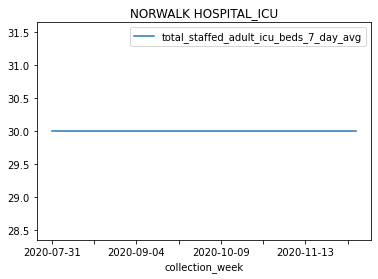

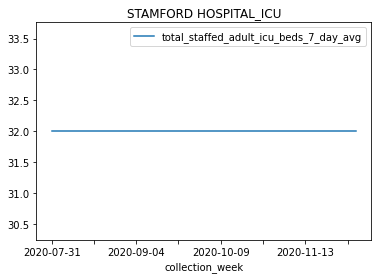

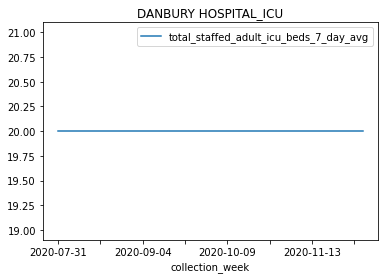

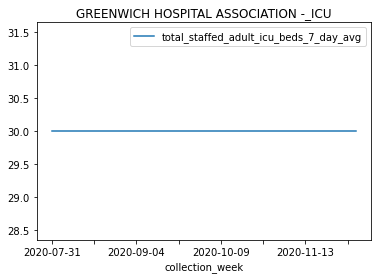

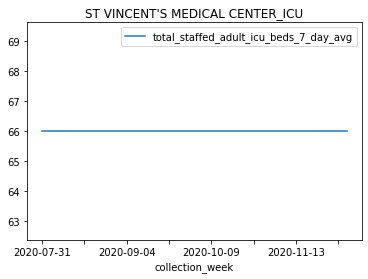

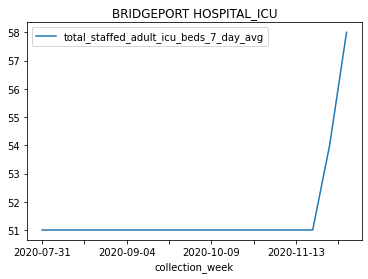

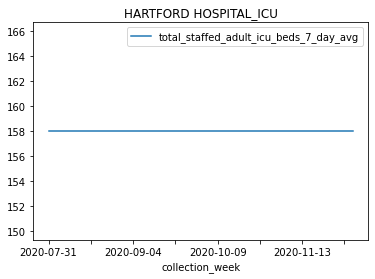

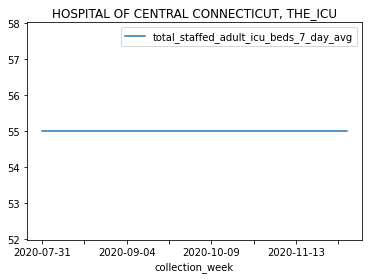

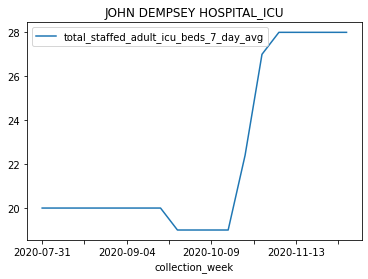

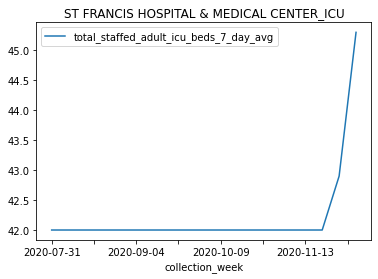

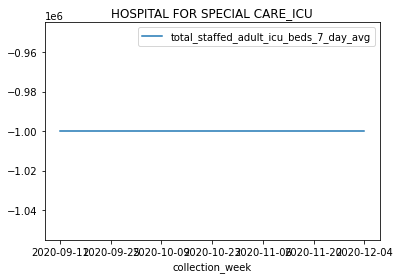

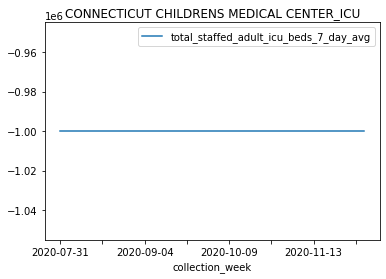

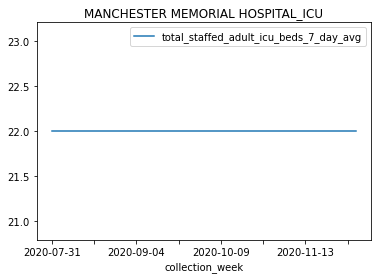

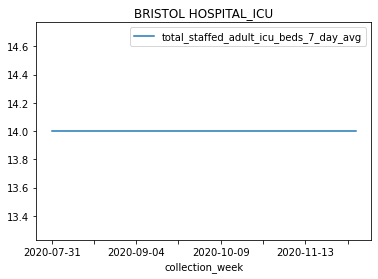

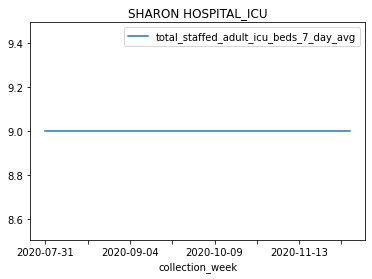

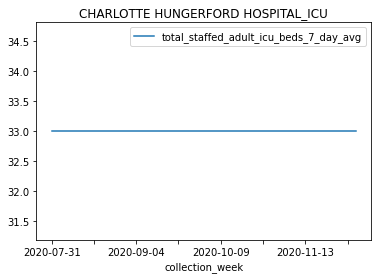

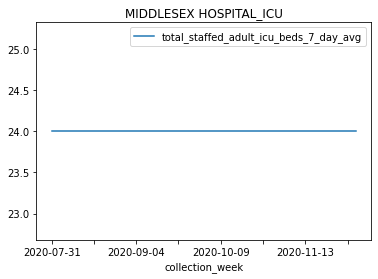

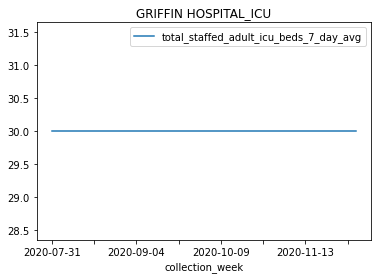

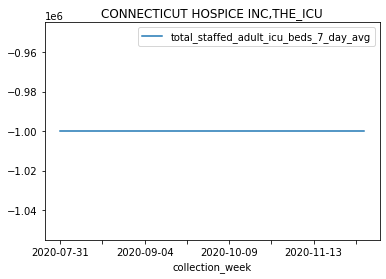

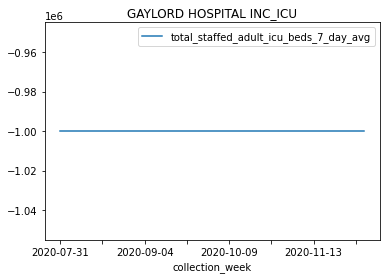

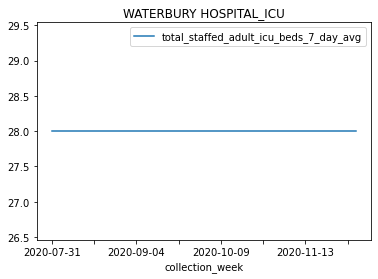

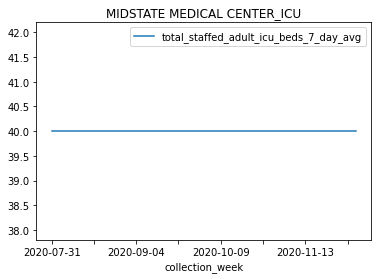

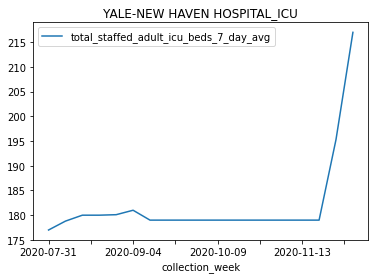

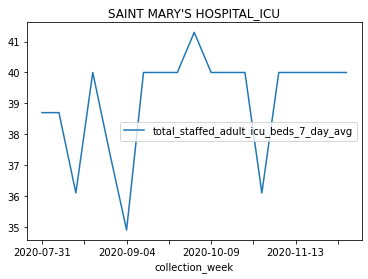

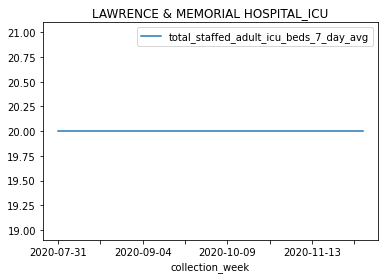

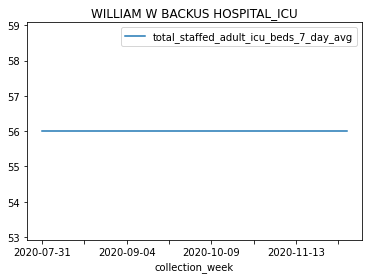

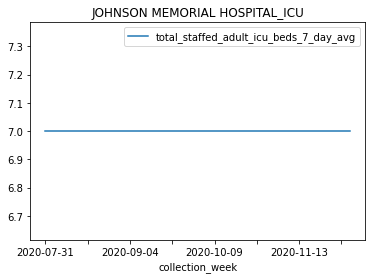

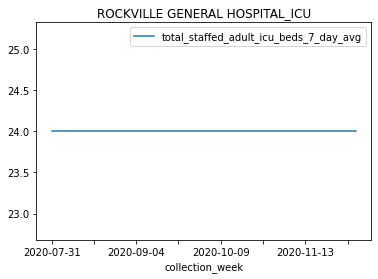

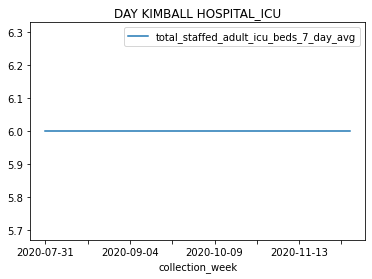

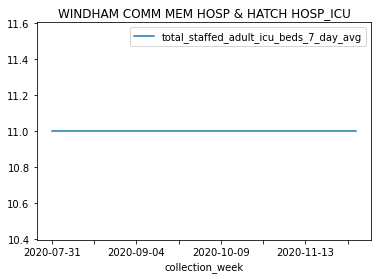

In [146]:
for name in list(df_ct['hospital_name'].unique()):
#     print(name)
    df_mary = df_ct[df_ct['hospital_name'].str.contains(name)]
 #   print('inpatient')
   # ax = df_mary.sort_values(by='collection_week').plot(x='collection_week',y='inpatient_beds_7_day_avg')
   # ax.set_title(f'{name}_inpatient')
  #  print('ICUs')
    ax = df_mary.sort_values(by='collection_week').plot(x='collection_week',y='total_staffed_adult_icu_beds_7_day_avg')
    ax.set_title(f'{name}_ICU')


In [29]:
df_mary = df_ct[df_ct['hospital_name'].str.contains(r'MARY')]

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='collection_week'>

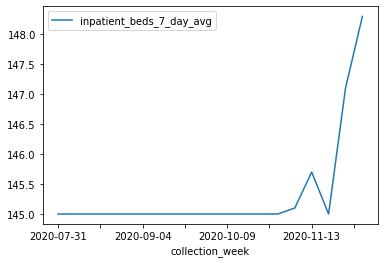

In [32]:
df_mary.sort_values(by='collection_week').plot(x='collection_week',y='inpatient_beds_7_day_avg')

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='collection_week'>

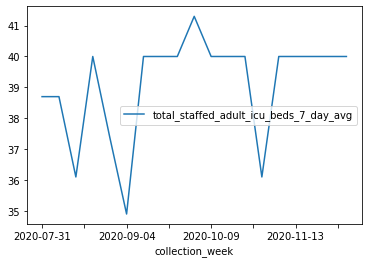

In [35]:
df_mary.sort_values(by='collection_week').plot(x='collection_week',y='total_staffed_adult_icu_beds_7_day_avg')

In [33]:
df_francis = df_ct[df_ct['hospital_name'].str.contains(r'FRANCIS')]

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='collection_week'>

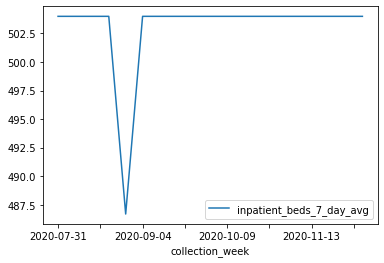

In [34]:
df_francis.sort_values(by='collection_week').plot(x='collection_week',y='inpatient_beds_7_day_avg')

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='collection_week'>

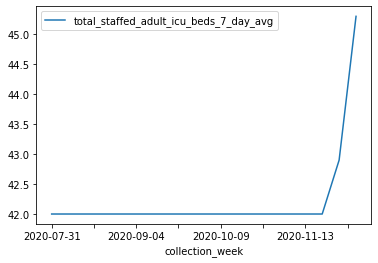

In [36]:
df_francis.sort_values(by='collection_week').plot(x='collection_week',y='total_staffed_adult_icu_beds_7_day_avg')

In [44]:
df_francis['total_staffed_adult_icu_beds_7_day_avg']

726      45.3
5626     42.9
10510    42.0
15407    42.0
20295    42.0
25178    42.0
30054    42.0
34936    42.0
39812    42.0
44680    42.0
49541    42.0
54397    42.0
59242    42.0
64085    42.0
68937    42.0
73765    42.0
78568    42.0
83346    42.0
88176    42.0
Name: total_staffed_adult_icu_beds_7_day_avg, dtype: float64